In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame


In [6]:
#Create DataFrame from Titanic Train csv file
titanictrain_df = pd.read_csv('train.csv')

In [11]:
#Preview Data
titanictrain_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [42]:
# General info of the Dataset
titanictrain_df.info()
titanictrain_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
 import matplotlib.pyplot as plt
 import seaborn as sns
%matplotlib inline


In [33]:

for col in titanictrain_df.columns:
    print(col)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


# Number of passengers by gender


In [63]:
titanictrain_df.groupby('Sex').count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312
male,577,577,577,577,453,577,577,577,577,107,577


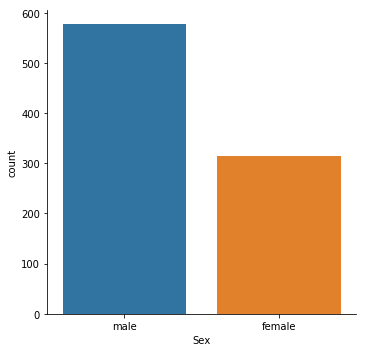

In [62]:
# Column Chart for number of passengers by Genger/Sex using seaborn catplot()
sns.catplot(x ='Sex',kind ="count", data = titanictrain_df, kwargs={}) 


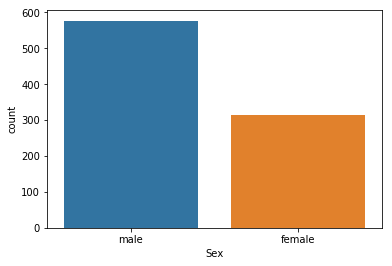

In [54]:
# Column Chart for number of passengers by Genger/Sex using seaborn countplot()

sns.countplot(x="Sex", data= titanictrain_df)

# Number of passengers by gender and Pclass

In [77]:
titanictrain_df[['PassengerId','Sex','Pclass']].groupby(['Sex','Pclass']).count()

PassengerId
Sex    Pclass             
female 1                94
       2                76
       3               144
male   1               122
       2               108
       3               347

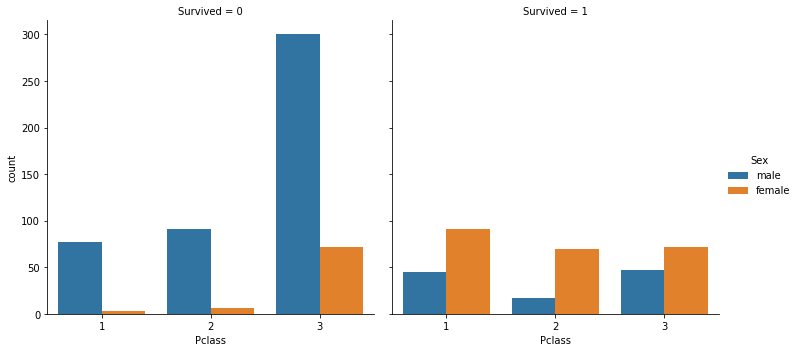

In [100]:
# Column chart  by Pclass, 'hue'= 'Sex' and 'Survived'
sns.catplot(x='Pclass',data=titanictrain_df, hue='Sex', kind='count')

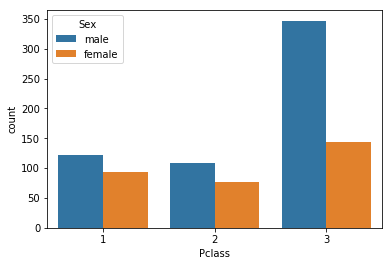

In [99]:
sns.countplot(hue='Sex', data=titanictrain_df, x='Pclass' )

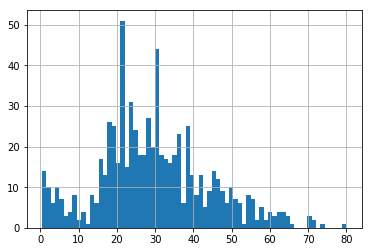

In [92]:
#Histogram of Age
titanictrain_df['Age'].hist(bins=70)

In [189]:
#Creating new column to show male, female and child
def M_F_C(passenger):
    age, sex  = passenger
    if age < 16:
        return 'child'
    else:
        return sex
    
titanictrain_df['Person']= titanictrain_df[['Age','Sex']].apply(M_F_C, axis=1)
titanictrain_df[titanictrain_df['Person']=='child'].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,child
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q,child


In [190]:
titanictrain_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


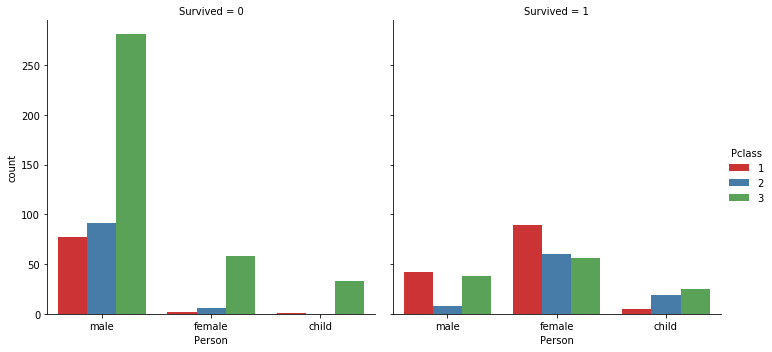

In [145]:
# Column chart of count of male, female and child that were survived (survived=1)and not survived (survived=0) by 'Pclass'
sns.set_palette("Set1" )
sns.catplot(x='Person', data = titanictrain_df,hue='Pclass', col='Survived', kind='count')


In [157]:
# Overall comparison of male,female,child

titanictrain_df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

In [158]:
# Overall comparison of male,female,child
titanictrain_df[['PassengerId','Person']].groupby('Person').count()


,PassengerId
Person,
child,83
female,271
male,537


In [163]:
#  Overall average age
titanictrain_df['Age'].mean()

29.69911764705882

In [162]:
# Average age of male , female and child
titanictrain_df[['Age','Person']].groupby('Person').mean()

,Age
Person,
child,6.369518
female,32.000000
male,33.173123


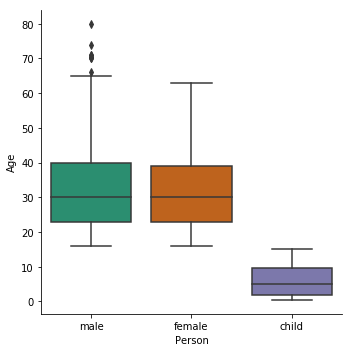

In [165]:
# Average age of male , female and child - Boxplot
sns.set_palette("Dark2" )
sns.catplot(x='Person', y= 'Age' , data = titanictrain_df, kind='box')


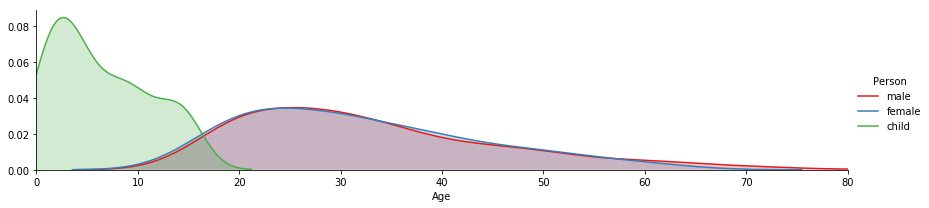

In [175]:
# Use of FacetGrid
sns.set_palette("Set1" )
figure=sns.FacetGrid(data= titanictrain_df, hue ='Person', aspect=4)
figure.map(sns.kdeplot, 'Age', shade=True)
max_age= titanictrain_df['Age'].max()
figure.set(xlim=(0, max_age))
figure.add_legend()


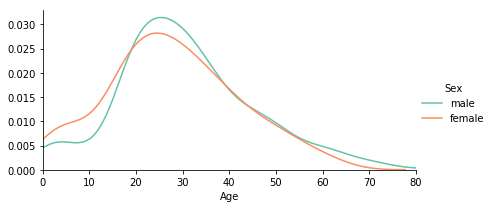

In [184]:
sns.set_palette('Set2')
figure=sns.FacetGrid(data = titanictrain_df, hue= 'Sex', aspect= 2)
figure.map(sns.kdeplot,'Age')
max_age= titanictrain_df['Age'].max()
figure.set(xlim=(0,max_age)) 
figure.add_legend()

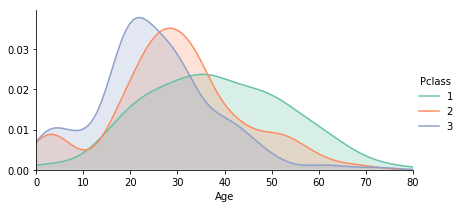

In [188]:
sns.set_palette('Set2')
figure=sns.FacetGrid(data = titanictrain_df, hue= 'Pclass', aspect=2)
figure.map(sns.kdeplot,'Age', shade=True)
max_age= titanictrain_df['Age'].max()
figure.set(xlim=(0,max_age)) 
figure.add_legend()

In [193]:
# Dropping null values in Cabin column
new_Cabin = titanictrain_df['Cabin'].dropna()
new_Cabin.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

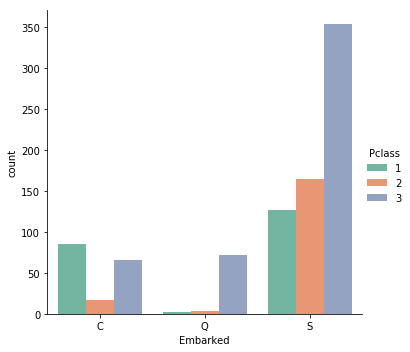

In [207]:
# Embarked: #Origin of the passengers
sns.catplot(data= titanictrain_df, x= 'Embarked', hue = 'Pclass', kind='count', order=['C','Q','S'])

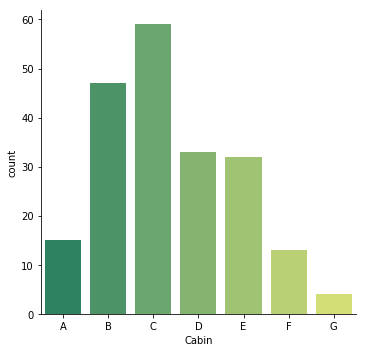

In [206]:
# find the level by takinf the first letter from new_Cabin. Eg(A,B,C)
levels = []
for lev in new_Cabin:
    levels.append(lev[0])
    
new_Cabin_df= DataFrame(levels)
new_Cabin_df.columns=['Cabin']
sns.catplot(data = new_Cabin_df, x= 'Cabin', palette='summer', kind='count',order= ['A','B','C','D','E','F','G'])

In [209]:
titanictrain_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,male


In [211]:
# Alone and family passengers. Alone when SibSp and Parched both are 0.
def PType(passenger):
    SibSp, Parch  = passenger
    if SibSp ==0 and Parch ==0:
        return 'Alone'
    else:
        return 'Family'
    
titanictrain_df['PassengerType']= titanictrain_df[['SibSp','Parch']].apply(PType, axis=1)
titanictrain_df[0:15]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,PassengerType
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,Alone
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,Family
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,Family
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,Family


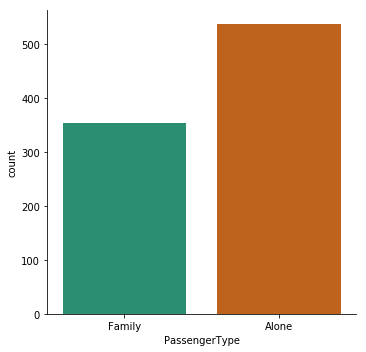

In [214]:
sns.catplot(data=titanictrain_df , x= 'PassengerType', kind='count',palette ='Dark2')

In [215]:
titanictrain_df['PassengerType'].value_counts()

Alone     537
Family    354
Name: PassengerType, dtype: int64

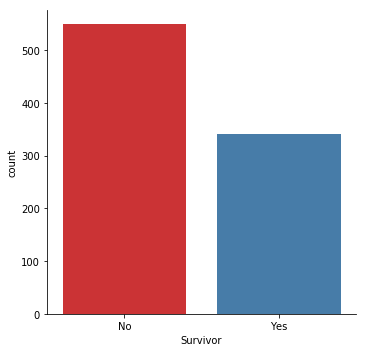

In [222]:
# People Survived and Not Survived
titanictrain_df['Survivor']= titanictrain_df.Survived.map({0:'No', 1:'Yes'})
sns.catplot(data=titanictrain_df , x= 'Survivor', kind='count',palette ='Set1')

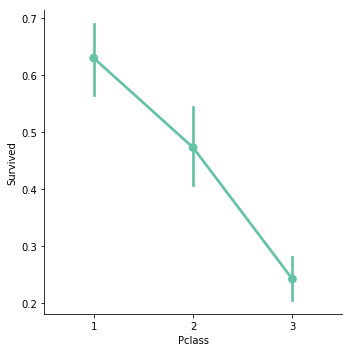

In [234]:
sns.factorplot(data=titanictrain_df , x='Pclass', y='Survived', kind='point')

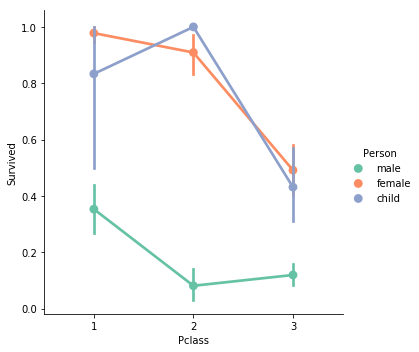

In [236]:
sns.catplot(data=titanictrain_df , x='Pclass', y='Survived', kind='point', hue = 'Person')

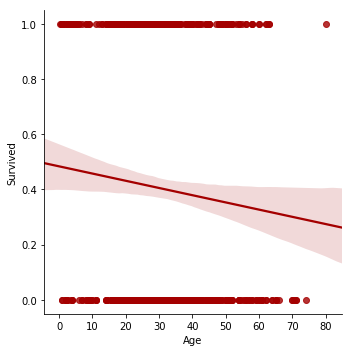

In [263]:
sns.set_palette('flag',1)
sns.lmplot('Age','Survived', titanictrain_df)

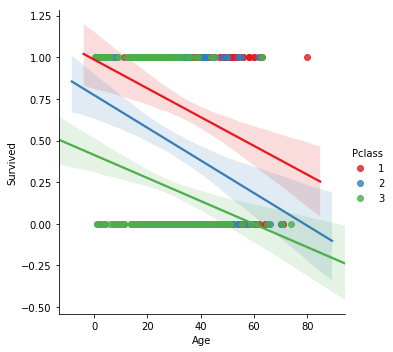

In [266]:
sns.set_palette('Set1')
sns.lmplot('Age','Survived', titanictrain_df, hue= 'Pclass')

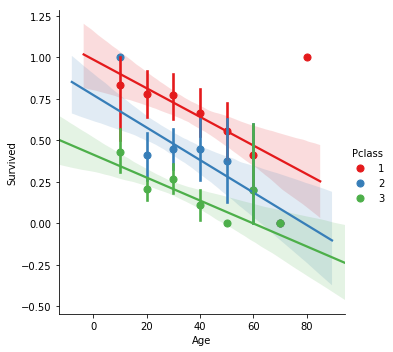

In [270]:
generations= [10,20,30,40,50,60,70,80]
sns.lmplot('Age','Survived', titanictrain_df, hue= 'Pclass', x_bins= generations)

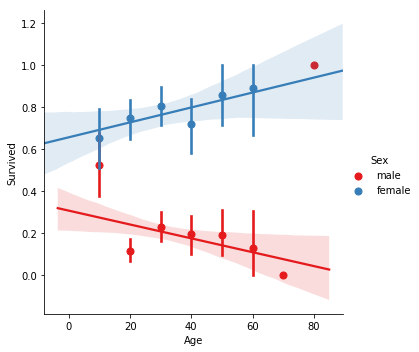

In [272]:
# Surived based on Age and sex
sns.lmplot('Age','Survived', titanictrain_df, hue= 'Sex', x_bins= generations)

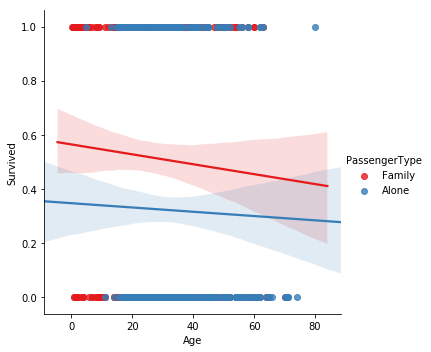

In [278]:
# Surived based on Age and sex
sns.lmplot('Age','Survived', titanictrain_df, hue= 'PassengerType')

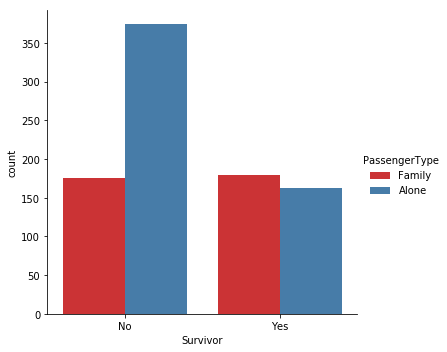

In [276]:
titanictrain_df['Survivor']= titanictrain_df.Survived.map({0:'No', 1:'Yes'})
sns.catplot(data=titanictrain_df , x= 'Survivor', kind='count',hue ='PassengerType',palette ='Set1')